In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Ames_Housing_Data.csv")

In [3]:
df.corr()["SalePrice"].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

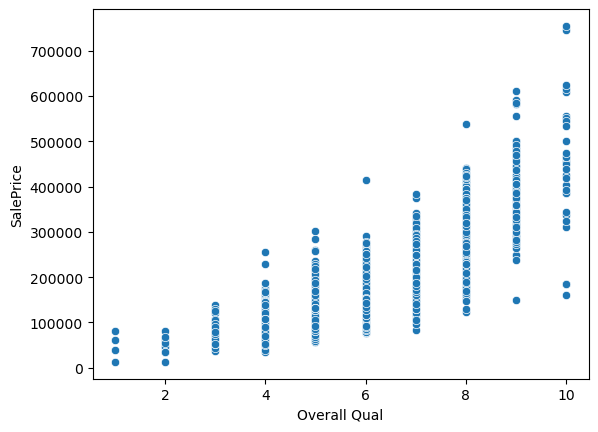

In [4]:
sns.scatterplot(x = "Overall Qual", y = "SalePrice", data = df)

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

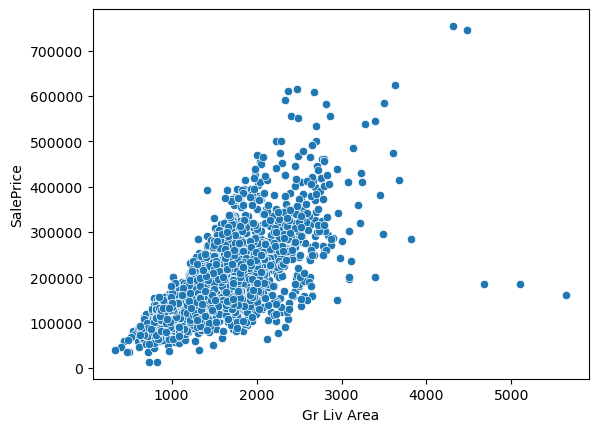

In [5]:
sns.scatterplot(x = "Gr Liv Area", y = "SalePrice", data = df)

In [6]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [7]:
drop_ind = df[(df["Gr Liv Area"]>4000) & (df['SalePrice']<400000)].index

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

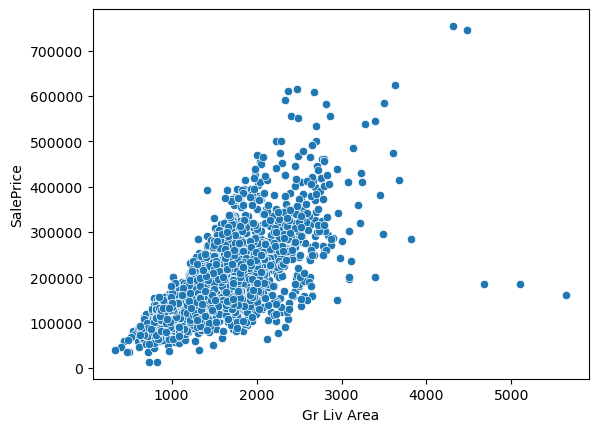

In [8]:
sns.scatterplot(x = "Gr Liv Area", y = "SalePrice", data = df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [10]:
df = df.drop("PID", axis = 1)

In [11]:
len(df.columns)

80

In [12]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64

In [13]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [14]:
missing = percent_missing(df)

In [15]:
missing.index

Index(['Electrical', 'Garage Area', 'Total Bsmt SF', 'Bsmt Unf SF',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Garage Cars', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Mas Vnr Area', 'Mas Vnr Type', 'BsmtFin Type 1',
       'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 2', 'Bsmt Exposure',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Garage Yr Blt', 'Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley',
       'Misc Feature', 'Pool QC'],
      dtype='object')

(0.0, 1.0)

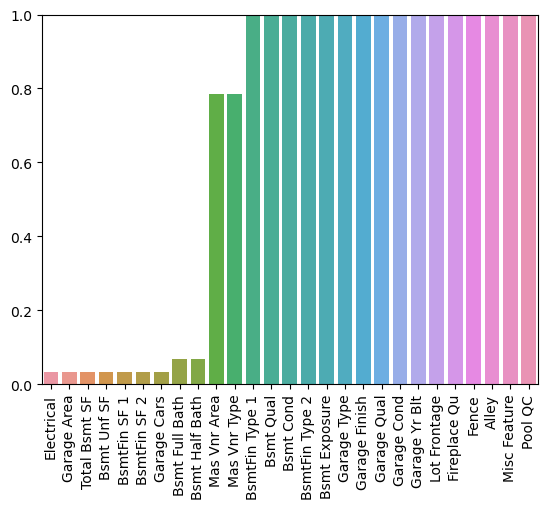

In [16]:
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [17]:
missing[missing <1]

Electrical        0.034130
Garage Area       0.034130
Total Bsmt SF     0.034130
Bsmt Unf SF       0.034130
BsmtFin SF 1      0.034130
BsmtFin SF 2      0.034130
Garage Cars       0.034130
Bsmt Full Bath    0.068259
Bsmt Half Bath    0.068259
Mas Vnr Area      0.784983
Mas Vnr Type      0.784983
dtype: float64

In [18]:
df[df["Electrical"].isnull()]["Garage Area"]

1577    400.0
Name: Garage Area, dtype: float64

In [19]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [20]:
df = df.dropna(axis = 0, subset = ["Electrical", "Garage Cars"])

In [21]:
missing = percent_missing(df)

In [22]:
missing[missing < 1]

Bsmt Unf SF       0.034153
Total Bsmt SF     0.034153
BsmtFin SF 2      0.034153
BsmtFin SF 1      0.034153
Bsmt Full Bath    0.068306
Bsmt Half Bath    0.068306
Mas Vnr Type      0.785519
Mas Vnr Area      0.785519
dtype: float64

(0.0, 1.0)

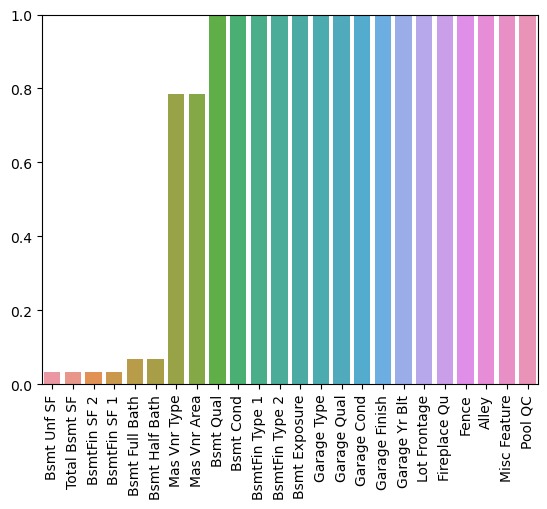

In [23]:
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [24]:
df[df["Bsmt Half Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [25]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [26]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [27]:
df[df["Bsmt Full Bath"].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [28]:
missing = percent_missing(df)

In [29]:
missing

Mas Vnr Type      0.785519
Mas Vnr Area      0.785519
Garage Type       5.362022
Garage Yr Blt     5.396175
Garage Finish     5.396175
Garage Qual       5.396175
Garage Cond       5.396175
Lot Frontage     16.734973
Fireplace Qu     48.497268
Fence            80.498634
Alley            93.237705
Misc Feature     96.379781
Pool QC          99.556011
dtype: float64

(0.0, 1.0)

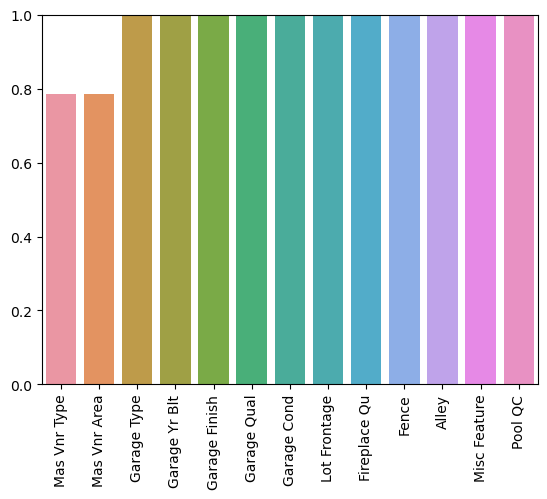

In [30]:
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90)
plt.ylim(0,1)

In [31]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")

In [32]:
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna("None")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Mas Vnr Type'),
  Text(1, 0, 'Mas Vnr Area'),
  Text(2, 0, 'Garage Type'),
  Text(3, 0, 'Garage Yr Blt'),
  Text(4, 0, 'Garage Finish'),
  Text(5, 0, 'Garage Qual'),
  Text(6, 0, 'Garage Cond'),
  Text(7, 0, 'Lot Frontage'),
  Text(8, 0, 'Fireplace Qu'),
  Text(9, 0, 'Fence'),
  Text(10, 0, 'Alley'),
  Text(11, 0, 'Misc Feature'),
  Text(12, 0, 'Pool QC')])

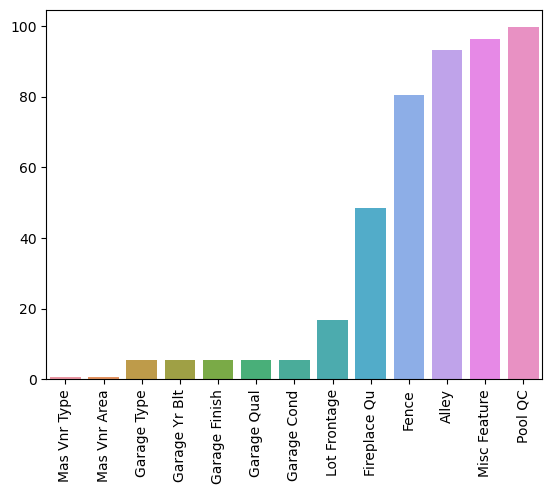

In [33]:
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90)

In [34]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [35]:
missing = percent_missing(df)

In [36]:
missing

Garage Yr Blt     5.396175
Lot Frontage     16.734973
Fireplace Qu     48.497268
Fence            80.498634
Alley            93.237705
Misc Feature     96.379781
Pool QC          99.556011
dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Garage Yr Blt'),
  Text(1, 0, 'Lot Frontage'),
  Text(2, 0, 'Fireplace Qu'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Alley'),
  Text(5, 0, 'Misc Feature'),
  Text(6, 0, 'Pool QC')])

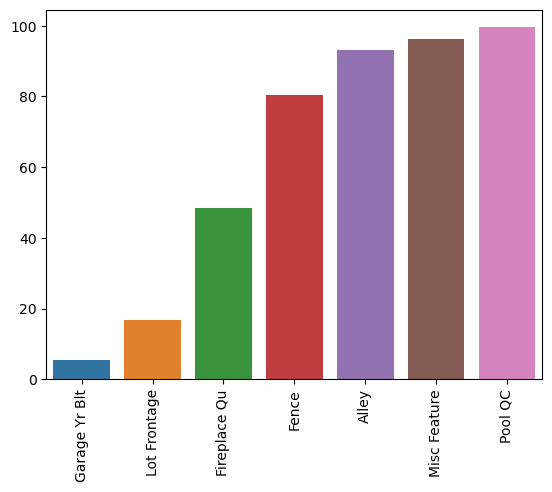

In [37]:
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90)

In [38]:
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(0)

In [39]:
missing = percent_missing(df)

In [40]:
missing

Lot Frontage    16.734973
Fireplace Qu    48.497268
Fence           80.498634
Alley           93.237705
Misc Feature    96.379781
Pool QC         99.556011
dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Fence'),
  Text(3, 0, 'Alley'),
  Text(4, 0, 'Misc Feature'),
  Text(5, 0, 'Pool QC')])

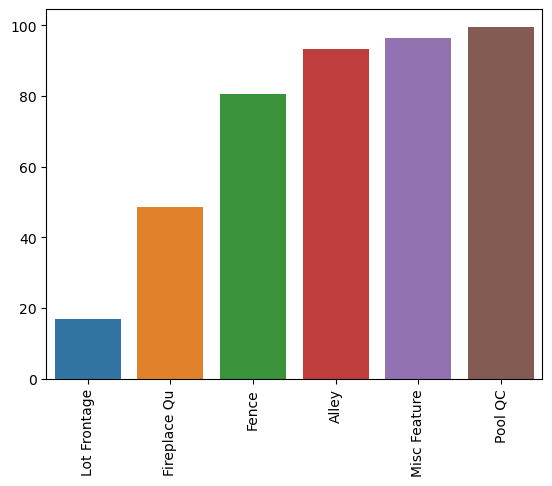

In [41]:
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90)

In [42]:
df = df.drop(["Pool QC", "Misc Feature", "Alley", "Fence"], axis = 1)

In [43]:
missing = percent_missing(df)

In [44]:
missing

Lot Frontage    16.734973
Fireplace Qu    48.497268
dtype: float64

(array([0, 1]), [Text(0, 0, 'Lot Frontage'), Text(1, 0, 'Fireplace Qu')])

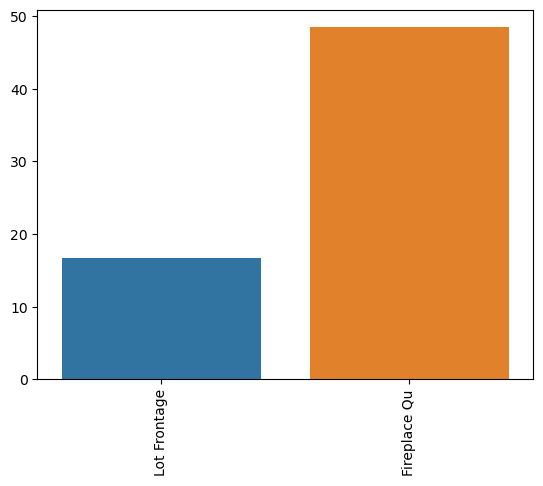

In [45]:
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90)

In [46]:
df["Fireplace Qu"].value_counts()

Gd    744
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [47]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [48]:
missing = percent_missing(df)

In [49]:
missing

Lot Frontage    16.734973
dtype: float64

(array([0]), [Text(0, 0, 'Lot Frontage')])

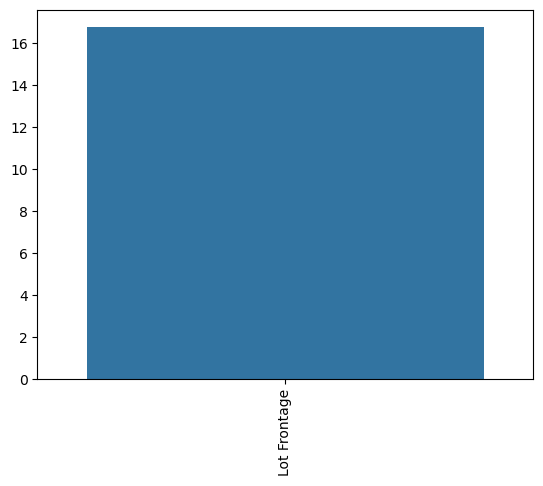

In [50]:
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

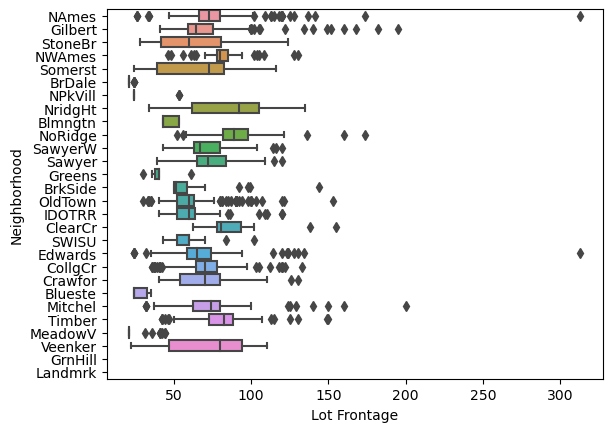

In [51]:
sns.boxplot(x = "Lot Frontage", y = "Neighborhood", data = df)

In [52]:
df["Lot Frontage"] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [53]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

In [54]:
missing = percent_missing(df)

(array([0]), [Text(0, 0, 'Lot Frontage')])

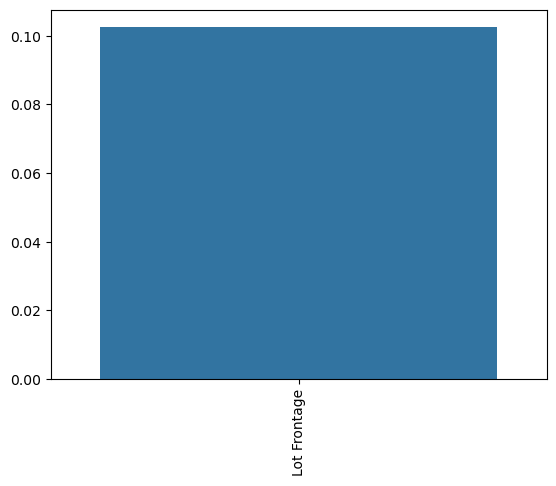

In [55]:
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90)

In [56]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [57]:
missing = percent_missing(df)

In [58]:
df["MS SubClass"] = df["MS SubClass"].apply(str)

In [59]:
direction = pd.Series(["Up", "Up", "Down"])

In [60]:
direction

0      Up
1      Up
2    Down
dtype: object

In [61]:
pd.get_dummies(direction, drop_first = True)

,Up
0,1
1,1
2,0


In [62]:
df.select_dtypes(include="object")

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2928 non-null   object 
 1   MS Zoning        2928 non-null   object 
 2   Lot Frontage     2928 non-null   float64
 3   Lot Area         2928 non-null   int64  
 4   Street           2928 non-null   object 
 5   Lot Shape        2928 non-null   object 
 6   Land Contour     2928 non-null   object 
 7   Utilities        2928 non-null   object 
 8   Lot Config       2928 non-null   object 
 9   Land Slope       2928 non-null   object 
 10  Neighborhood     2928 non-null   object 
 11  Condition 1      2928 non-null   object 
 12  Condition 2      2928 non-null   object 
 13  Bldg Type        2928 non-null   object 
 14  House Style      2928 non-null   object 
 15  Overall Qual     2928 non-null   int64  
 16  Overall Cond     2928 non-null   int64  
 17  Year Built    

In [75]:
df = pd.get_dummies(df)

In [76]:
X = df.drop("SalePrice", axis = 1)

In [77]:
y = df["SalePrice"]

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

In [82]:
scaler.fit(X_train)

StandardScaler()

In [83]:
X_train = scaler.transform(X_train)

In [84]:
X_test = scaler.transform(X_test)

In [85]:
from sklearn.linear_model import Ridge

In [86]:
model = Ridge(alpha = 100)

In [87]:
model.fit(X_train, y_train)

Ridge(alpha=100)

In [88]:
y_pred = model.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
mean_squared_error(y_test, y_pred)

878348065.8864334

In [91]:
model2 = Ridge(alpha = 1)

In [92]:
model2.fit(X_train, y_train)

Ridge(alpha=1)

In [93]:
predict2 = model2.predict(X_test)

In [94]:
mean_squared_error(y_test, predict2)

909705562.8276029